<a href="https://colab.research.google.com/github/Luigi-Pontello/data_analyst_luigipontello/blob/main/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Sua Cidade*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade do Rio de Janeiro, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Os dados aqui representados e analisados foram retirados do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Nesta primeira análise exploratória, iremos utilizar o arquivo mais compacto, onde possui menos entidades, que é o arquivo:

* `listings.csv` - *Summary information and metrics for listings in Rio de Janeiro (good for visualisations).*

In [2]:
# importar os pacotes necessarios

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-04-20/visualisations/listings.csv")

## Análise dos Dados

A ideia desta primeira etapa, é fazer com que eu, ou você, tenhamos uma ideia de onde estamos nos metendo. De uma forma mais formal, entender como os dados estão compostos, como estão estruturados, quais dados nós temos, para ai sim tratarmos ou não estes, e a posterior, realizarmos análises e extrairmos insights.


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Porém antes de pensarmos em qualquer análise, vamos ver como nosso *dataset* esta, observando as 5 primeiras linhas dele.

In [4]:
# mostrar as 5 primeiras entradas
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,Very Nice 2Br - Copacabana - WiFi,68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,218,5,251,2020-04-06,2.11,1,0
1,21280,Renovated Modern Apt. Near Beach,81163,Jules,NaN,Ipanema,-22.98467,-43.19611,Entire home/apt,422,5,94,2020-03-22,1.25,1,69
2,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97712,-43.19045,Entire home/apt,158,7,238,2020-02-15,1.98,3,95
3,31560,NICE & COZY 1BDR - IPANEMA BEACH,135635,Renata,NaN,Ipanema,-22.98302,-43.21427,Entire home/apt,342,2,282,2020-03-02,2.37,1,0
4,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,479,2,181,2020-03-15,2.29,1,358


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Neste momento, vamos identificar quais são as entradas de dados que o nosso dataset possui, e ver quais são os tipos das colunas.

Conforme mencionado anteriormente, é um dataset na versão mais compacta. Caso queira uma investigação bem mais profunda, é oferecido um dataset em uma versão mais completa, com  35847 entradas e 106 variáveis (`listings.csv.gz`).

In [5]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset

display(df.dtypes)


Entradas:	 35870
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Não adianta muito querermos extrair análises de um dataset onde os dados não possuem uma boa qualidade para extração de informações. Sendo assim, um detalhe importante de ser feito, logo de início, é conferir se os valores nulos, comparados com os valores totais, são uma porcentagem consideravel, a ponto de colocar o dataset em cheque.

* Notamos logo que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase metade das linhas.
* As variáveis `name` e `host_name` têm aproximadamente 0,1% dos valores nulos.

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.411653
last_review                       0.411653
name                              0.001617
host_name                         0.000139
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Neste momento, a ideia é checarmos como todas as variáveis estão distribuídas, sendo assim, plotarei um histograma.

### **Q4. Qual a média dos preços de aluguel?**

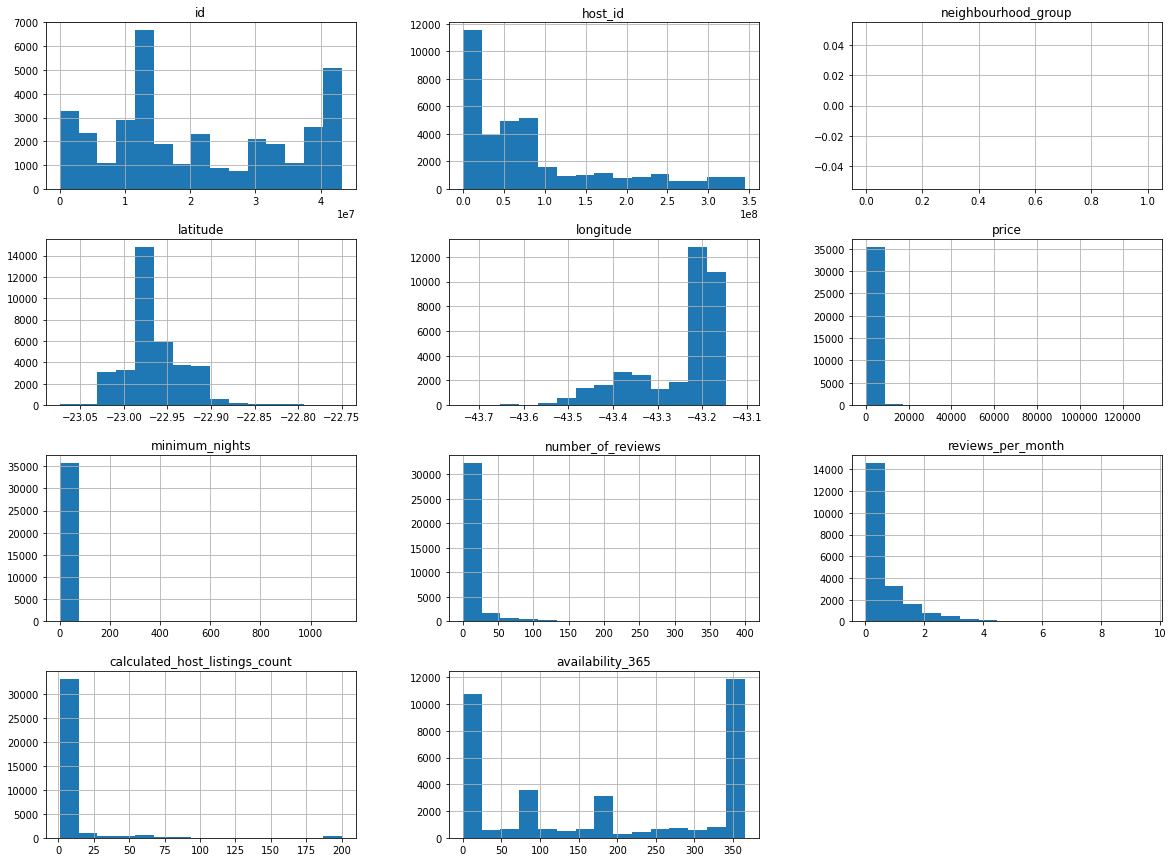

In [7]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(20,15));

In [ ]:
# ver a média da coluna `price``


### **Q4. Temos algum *outlier* neste dataset?**
 Primeiro é importante entender o que é um outlier, caso você não saiba, outlier é uma observação que se diferenciada muito das demais informações ou de um padrão. Um exemplo fácil é uma partida de 10x0 em um campeonato de futebol, pode ate acontecer, mas é algo bem fora da curva.

Observando nosso histograma, notamos que possivelmente temos alguns outliers presentes.
Se olharmos com calma, os dados de `price`, `minimum_nights` e `calculated_host_listings_count` possuem informações que se distanciam demais de um padrão, fazendo com que o gráfico fique basicamente em um local único.

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.


In [8]:
# checar o resumo estatístico das variáveis numéricas

df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,35870.000000,35870.000000,35870.000000,21104.000000,35870.000000,35870.000000
mean,753.686367,4.781851,9.822972,0.652248,6.613995,180.371815
std,2229.366334,22.471085,25.827647,0.823388,22.769663,152.510778
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,158.000000,1.000000,0.000000,0.130000,1.000000,0.000000
50%,298.000000,2.000000,1.000000,0.340000,1.000000,178.000000
75%,632.000000,4.000000,6.000000,0.830000,3.000000,363.000000
max,131727.000000,1123.000000,399.000000,9.570000,200.000000,365.000000


Quando olhamos os dados estatísticos do dataset ja observamos que algumas hipóteses foram confirmadas.
* Perceba que a variável `price` está com 75% do valor aproximadamente abaixo de 632 reais, porém seu valor máximo é de 131.727 reais, um valor 20.842% maior que a média.
* O mesmo vale para a quantidade mínima por noites, que a média de é aproximadamente 5 noites, porém temos um valor de 1123 noites.

### Boxplot para minimum_nights



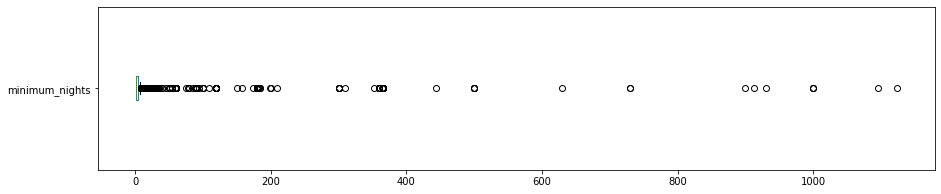

minimum_nights: valores acima de 30:
224 entradas
0.6245%


In [16]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30 ]) / df.shape[0])*100))


#### Boxplot para price


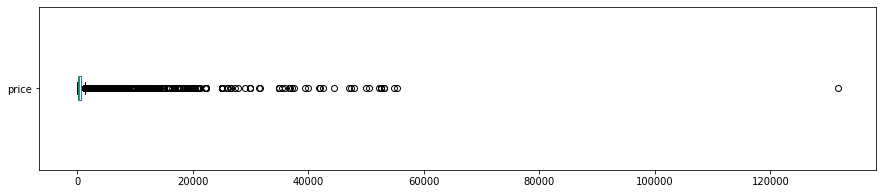


price: valores acima de 1500
3360 entradas
9.3672%


In [19]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100 ))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

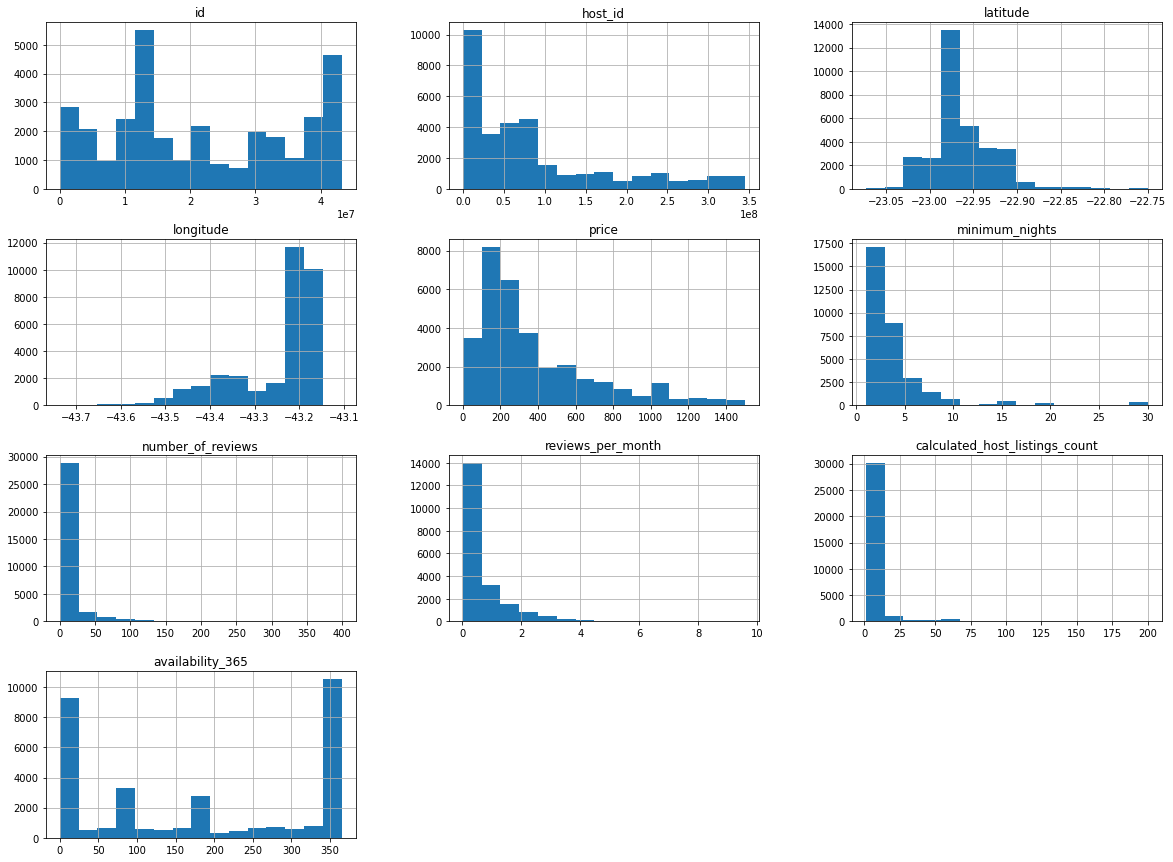

In [23]:
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis = 0, inplace=True)

#remover `neighbourhood_group`, ja que não serve pra nada pois esta vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

#plotar o histograma

df_clean.hist(bins=15, figsize=(20,15));


### **Q4. Qual a correlação existente entre as variáveis**

Uma análise de correlação é uma análise descritiva que mede se há e qual o grau de dependência entre duas variáveis (desconto e vendas), como no exemplo simplificado à seguir: Se o desconto e as vendas aumentam e diminuem quase sempre juntos: há correlação positiva.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [24]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação

display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.163318,-0.162241,-0.162366,0.047043,-0.015328
minimum_nights,0.163318,1.000000,-0.059857,-0.080109,-0.033148,-0.016418
number_of_reviews,-0.162241,-0.059857,1.000000,0.645518,-0.026347,0.050653
reviews_per_month,-0.162366,-0.080109,0.645518,1.000000,-0.013855,-0.020716
calculated_host_listings_count,0.047043,-0.033148,-0.026347,-0.013855,1.000000,0.073733
availability_365,-0.015328,-0.016418,0.050653,-0.020716,0.073733,1.000000


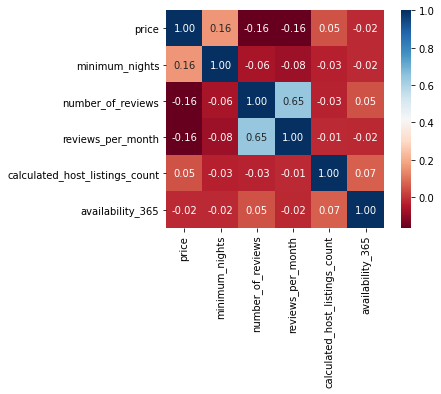

In [30]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável room_type indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método value_counts().

In [31]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    22418
Private room        8969
Shared room          765
Hotel room           160
Name: room_type, dtype: int64

In [32]:
# mostrar a porcentagem de cada tipo de imóvel disponível
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.693798
Private room       0.277575
Shared room        0.023675
Hotel room         0.004952
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do Rio de Janeiro?**

Eu de cara chutaria Ipanema, ou Leblon, como alguém que só vê o Rio normalmente pela TV, porém a melhor forma de fazermos isso é comparar através do `groupby()`, usando de base os bairros (Neighbouhoods) a partir do preço de locação.



In [33]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Vaz Lobo                  875.666667
Engenheiro Leal           800.000000
Ricardo de Albuquerque    601.200000
Paciência                 523.555556
Lagoa                     522.097859
Abolição                  483.666667
Leblon                    479.767359
Anchieta                  475.600000
Deodoro                   474.000000
Joá                       472.382979
Name: price, dtype: float64

Acima, vemos que bairros como Vaz Lobo, Engenheiro Albuquerque e Paciência, estão com média de preço superior a de lugares como Leblon, Barra da Tijuca e Lagoa.

Uma pessoa que não conhecesse o Rio, como eu mesmo, poderia apresentar esses resultados sem se questionar. Só para dar um único exemplo de como uma amostra pode ser não-representativa, veja quantas entradas há para o Vaz Lobo.

In [34]:
# ver quantidade de imóveis no Vaz Lobo
print(df_clean[df_clean.neighbourhood == "Vaz Lobo"].shape)

# ver as 3 entradas do Complexo do Alemão
df_clean[df_clean.neighbourhood == "Vaz Lobo"]

(3, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2908,2768499,Próximo ao Maracanã,14157867,Fernando,Vaz Lobo,-22.85955,-43.32918,Private room,1000,1,0,NaN,NaN,1,0
15776,14221134,"casa colonial 3 quartos, garagem",86402266,Lucia,Vaz Lobo,-22.85583,-43.32441,Entire home/apt,1329,15,0,NaN,NaN,1,365
33803,42012781,Casas flegler,332881900,Igor Flegler De Souza,Vaz Lobo,-22.86070,-43.32446,Private room,298,1,0,NaN,NaN,1,362


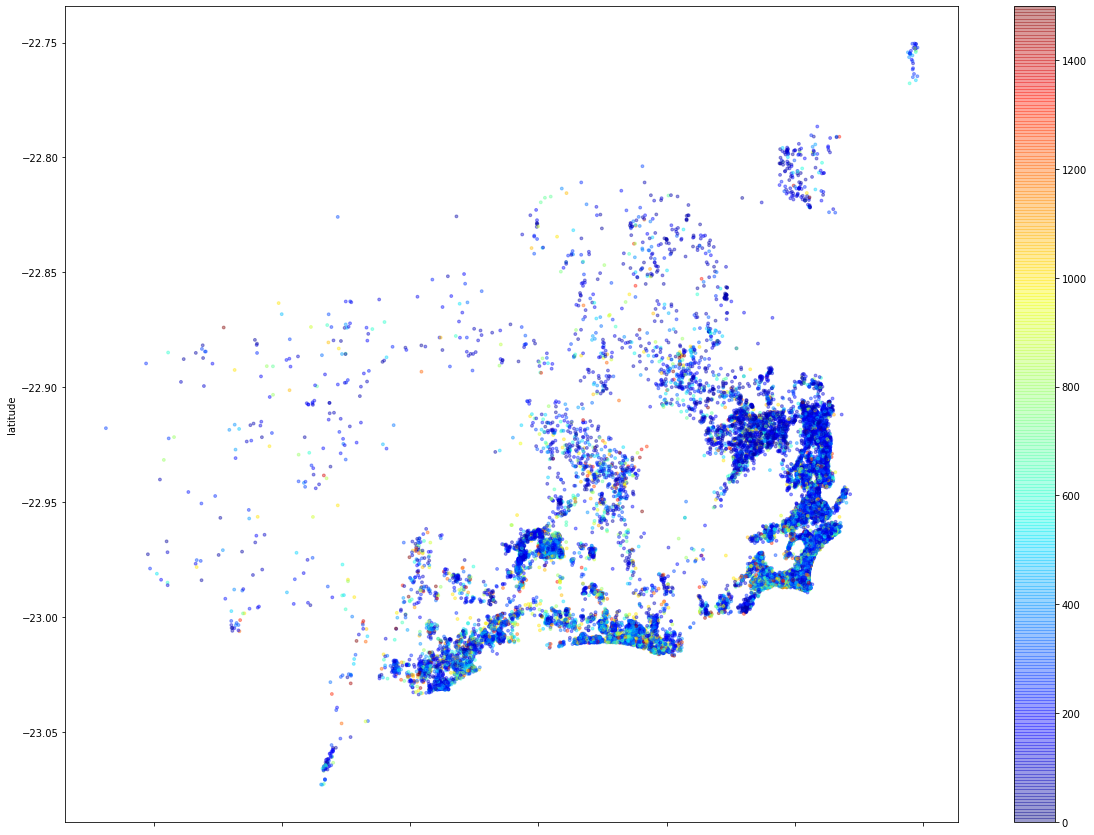

In [36]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize =(20,15))

## Conclusões

Esta análise foi feita em conjunto a uma etapa do nosso curso de Data Science, foi uma primeira análise introdutória com a base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis. 

Também notamos que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos, como foi o caso do bairro do Vaz do Lobo.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.